In [7]:
if False:
    %matplotlib notebook
    figsize = (10,6)
else:
    figsize = (12,8)

from sps_engineering_Lib_dataQuery.databasemanager import DatabaseManager
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

In [29]:
def outlierMask(array, outlierConstant=1.5):
    lowerQuartile = np.percentile(array, 25)
    upperQuartile = np.percentile(array, 75)
    IQR = (upperQuartile - lowerQuartile) * outlierConstant

    return np.logical_and(array >= lowerQuartile - IQR, array <= upperQuartile + IQR)


def interpdate(datas):
    
    mintai = np.max([data.tai.min() for data in datas])
    maxtai = np.min([data.tai.max() for data in datas])
    tai = np.arange(mintai, maxtai, 0.0002)
    res = pd.DataFrame({'tai':tai})
    for data in datas:
        for col in data.columns[2:]:
            mask = outlierMask(data[col].values)
            res[col] = np.interp(res['tai'], data['tai'].values[mask], data[col].values[mask])
            
    return res
    

In [9]:
db = DatabaseManager('tron', 5432, '')

In [10]:
db.init()

<connection object at 0x7f3b776f9bf8; dsn: 'dbname='archiver' user='pfs' password=xx host='tron' port='5432'', closed: 0>

In [14]:
cols= ['val1_%d'%i for i in range(10)]

temps = []
datasets = []
popts = []
steps = {20: ['2019-01-17 19:00', '2019-01-18 10:00'],
         15: ['2019-01-24 22:00', '2019-01-25 09:00'],
         10: ['2019-01-19 11:00', '2019-01-21 02:00'],
         5: ['2019-01-22 10:50', '2019-01-22 15:00'],
         0 :['2019-01-21 12:00', '2019-01-21 14:50'],
        }
         

In [ ]:
temps = pd.DataFrame(temps, columns=dataset.columns[1:])

In [16]:
specId, datestart, dateend = [1, '2019-01-25 14:30', '2019-01-26 22:30']

steps = {5: ['2019-01-21 22:00', '2019-01-22 10:30']}  #Calib_in

In [17]:
ref = db.dataBetween('aitroom__lake1', cols='temp1', start=datestart, end=dateend)
stage1 = db.dataBetween('enu_sm0__temps1', cols=','.join(cols), start=datestart, end=dateend)
stage2 = db.dataBetween('enu_sm0__temps2', cols=','.join(cols), start=datestart, end=dateend)
stage1.columns = ['id','tai'] + ['%d'%i for i in range(101,111)]
stage2.columns = ['id','tai'] + ['%d'%i for i in range(201,211)]
dataset = interpdate([ref, stage1, stage2])

datasets.append(dataset.rolling(window=8,center=False).median().dropna())

In [18]:
datasets = pd.concat(datasets)

In [2]:
import numpy as np

In [30]:
ref = db.dataBetween('aitroom__lake1', cols='temp1', start='2019-01-31 02:30', end='2019-01-31 05:30')

In [31]:
mask = outlierMask(ref.temp1.values)

In [34]:
np.sum(~mask)

1

In [26]:
np.mean(array)

nan

In [ ]:
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

In [ ]:
for col in dataset.columns[2:]:
    popt = np.polyfit(temps[col], temps['temp1']-temps[col], deg=2)
    datasets[col] = datasets[col] + np.polyval(popt, datasets[col])
    popts.append(popt)
    
    if True:
        tt = np.arange(0,20,0.01)
        fig = plt.figure(figsize=figsize)
        plt.plot(temps[col], temps['temp1']-temps[col], 'o', label='channel %s'%(col))
        plt.plot(tt, np.polyval(popt, tt), '-', label='fit %s'%(col))

popts = pd.DataFrame(popts, index=dataset.columns[2:], columns=['c1', 'c2', 'c3'])

In [ ]:
fig = plt.figure(figsize=figsize)

for col in datasets.columns[1:]:
    plt.plot_date(datasets.tai, datasets[col], 'o-', label='channel %s'%(col))
    
plt.grid()
plt.legend()

In [ ]:
fig = plt.figure(figsize=figsize)

for col in datasets.columns[2:]:
    plt.plot_date(datasets.tai, datasets['temp1']-datasets[col], 'o-', label='channel %s'%(col))
    
plt.grid()
plt.legend()

In [ ]:
error = []

for ref in datasets.columns[1:]:
    temp = datasets.drop(columns=['tai', ref])
    for col in temp.columns:
        mat = datasets[col] - datasets[ref]
        error.append((np.mean(mat), np.median(mat), np.std(mat), np.max(mat)-np.min(mat)))
    
error = pd.DataFrame(error, columns=['mean','median','std','minmax'])

In [ ]:
error.plot(figsize=figsize, grid=True)

In [ ]:
for channel, (c1,c2,c3) in popts.iterrows():
    print('%s=%.7f,%7f,%.7f'%(channel,c1,c2,c3))

In [ ]:
start = '2019-01-15 00:00'
end = False

In [ ]:
cols= ['val1_%d'%i for i in range(12)]

In [ ]:
cooler = db.dataBetween('xcu_r1__coolertemps', cols='tip,power', start=start, end=end)
temps = db.dataBetween('xcu_r1__temps', cols=','.join(cols), start=start, end=end)
ccd = db.dataBetween('ccd_r1__ccdtemps', cols='ccd0,ccd1', start=start, end=end)
ccd['ccd'] = (ccd['ccd0'] + ccd['ccd1'])/2
dataset = interpdate([cooler, temps, ccd])

In [ ]:
#!/usr/bin/env python
# encoding: utf-8

from matplotlib.dates import DateFormatter
from matplotlib.figure import Figure


fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax.hlines(163, dataset.tai.min(), dataset.tai.max())
ax.plot_date(dataset.tai, dataset['val1_0'], '-', label='detectorBox')
ax.plot_date(dataset.tai, dataset.ccd, '-', label='ccd')
ax.legend()
ax.grid()
ax2.plot_date(dataset.tai, dataset.power, '-', color='g', label='coolerPower')
ax2.legend()
ax2.grid()

ax.set_ylabel('Temperature(K)')
ax2.set_ylabel('Power(W)')

for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False

dateAxes = ax2
t0, tmax = dateAxes.get_xlim()
if tmax - t0 > 7:
    format_date = '%Y-%m-%d'
elif tmax - t0 > 1:
    format_date = '%a %H:%M'
else:
    format_date = '%H:%M:%S'

dateAxes.xaxis.set_major_formatter(DateFormatter(format_date))
plt.setp(dateAxes.xaxis.get_majorticklabels(), rotation=20, horizontalalignment='center')

fig.subplots_adjust(hspace=0.05)

In [ ]:
df = pd.read_csv('/software/mhs/devel/ics_aitroomActor/data_pt111_ref.csv')

In [ ]:
popt = np.polyfit(df.Resistance, df.Temperature, deg=4)

In [ ]:
x = np.arange(df.Resistance.min(), df.Resistance.max(), 0.001)
fit = np.polyval(popt, x)

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


ax.plot(df.Resistance, df.Temperature, 'o')
ax.plot(x, fit, 'o')

ax.legend()
ax.grid()

ax2.plot(df.Resistance, df.Temperature-np.polyval(popt, df.Resistance), '-')
ax2.legend()
ax2.grid()



In [ ]:
np.polyval(popt, 154)

In [ ]:
start = "2019-01-25 13:00"
end = False

In [ ]:
ref = db.dataBetween('aitroom__flowduino', cols='temp', start=start, end=end)
stage1 = db.dataBetween('enu_sm0__res1', cols=','.join(cols), start=start, end=end)
stage2 = db.dataBetween('enu_sm0__res2', cols=','.join(cols), start=start, end=end)
stage1.columns = ['id','tai'] + ['%d'%i for i in range(101,111)]
stage2.columns = ['id','tai'] + ['%d'%i for i in range(201,211)]
dataset = interpdate([ref, stage1, stage2])

In [ ]:
ref = db.dataBetween('aitroom__lake1', cols='temp1', start=start, end=end)
stage1 = db.dataBetween('enu_sm0__temps1', cols=','.join(cols), start=start, end=end)
stage2 = db.dataBetween('enu_sm0__temps2', cols=','.join(cols), start=start, end=end)
ref.columns = ['id','tai', 'temp']
stage1.columns = ['id','tai'] + ['%d'%i for i in range(101,111)]
stage2.columns = ['id','tai'] + ['%d'%i for i in range(201,211)]
dataset2 = interpdate([ref, stage1, stage2])


In [ ]:
def pt100(R, R0=100, a=0.00385):
    return (R/R0 - 1)/a - 0.241

In [ ]:
for col in dataset.columns[1:]:
    dataset[col] = pt100(dataset[col])

In [ ]:
error = [np.median(dataset[col]) - np.median(dataset2[col]) for col in dataset.columns[1:]]
print(np.mean(error))

In [ ]:
for col in dataset.columns[1:2]:
    fig = plt.figure(figsize=(15,10))
    plt.plot_date(dataset.tai, dataset[col], 'o-', label='res %s'%col)
    plt.plot_date(dataset2.tai, dataset2[col], 'o-', label='temp %s'%col)
    plt.grid()
    plt.legend()
    

In [ ]:
std1 = [np.std(dataset[col]) for col in dataset.columns[2:]]
std2 = [np.std(dataset2[col]) for col in dataset2.columns[2:]]

In [ ]:
np.mean(std1)

In [ ]:
np.mean(std2)

In [ ]:
np.std(dataset['temp'])

In [ ]:
np.std(dataset2['temp'])

In [2]:
filepath = '/software/mhs/devel/ics_aitroomActor/data_pt111_ref.csv'

In [4]:
df = pd.DataFrame.from_csv(filepath)

/software/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


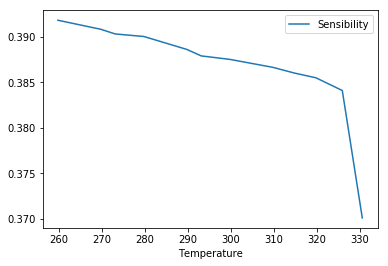

In [9]:
df.plot('Temperature')

In [8]:
df

,Temperature,Sensibility
Resistance,,
94.865,259.83,0.391792
98.779,269.82,0.390800
100.081,273.15,0.390288
102.687,279.82,0.390010
106.591,289.83,0.388589
107.882,293.15,0.387882
110.473,299.82,0.387500
114.348,309.82,0.386627
116.285,314.83,0.386000
